In [1]:
#1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [4]:
# ==================================
# 2. LOAD DATASET
# ==================================

# Define the file path to your Excel file
file_path = r"C:\Users\preet\Downloads\Predicting_bike_share_demand\preprocessed_data.xlsx"

# Start the 'try' block to catch potential errors
try:
    # Use pd.read_excel() to read the .xlsx file
    data = pd.read_excel(file_path)

    print(f"File '{file_path}' loaded successfully.")

    # ==================================
    # 3. INITIAL DATA INSPECTION
    # ==================================
    print("\n--- 3. Data Info ---")
    data.info()
    print("\n--- 3. Data Head ---")
    print(data.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while loading data: {e}")

File 'C:\Users\preet\Downloads\Predicting_bike_share_demand\preprocessed_data.xlsx' loaded successfully.

--- 3. Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  is_weekend  730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 68.6 KB

--- 3. Data Head ---
   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6        

In [5]:
# ==================================
# 4. DEFINE FEATURES (X) AND TARGET (y)
# ==================================
try:
    # 'cnt' is our target variable (what we want to predict)
    X = data.drop('cnt', axis=1)
    y = data['cnt']
    
    print(f"\n--- 4. Features (X) and Target (y) Defined ---")
    print(f"Feature shape: {X.shape}")
    print(f"Target shape: {y.shape}")

except NameError:
    print("Error: The 'data' variable was not loaded. Please run Cell 2 first.")
except Exception as e:
    print(f"An error occurred: {e}")


--- 4. Features (X) and Target (y) Defined ---
Feature shape: (730, 11)
Target shape: (730,)


In [6]:
# ==================================
# 5. TRAIN-TEST SPLIT
# ==================================
try:
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\n--- 5. Data Split ---")
    print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
    print(f"Testing set shape:  X={X_test.shape}, y={y_test.shape}")

except NameError:
     print("Error: X and y are not defined. Please run Cell 3 first.")
except Exception as e:
    print(f"An error occurred: {e}")


--- 5. Data Split ---
Training set shape: X=(584, 11), y=(584,)
Testing set shape:  X=(146, 11), y=(146,)


In [7]:
# ==================================
# 6. FEATURE SCALING
# ==================================
try:
    # Scaling is crucial for Ridge and Lasso regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Save the scaler object to 'scaler.pkl' for future use
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
        
    print("\n--- 6. Feature Scaling Complete ---")
    print("X_train and X_test have been scaled.")
    print("Scaler object saved to 'scaler.pkl'")

except NameError:
     print("Error: Training/test sets are not defined. Please run Cell 4 first.")
except Exception as e:
    print(f"An error occurred: {e}")


--- 6. Feature Scaling Complete ---
X_train and X_test have been scaled.
Scaler object saved to 'scaler.pkl'


In [8]:
# ==================================
# 7. MODEL DEFINITIONS
# ==================================

# Create a dictionary of all regression models to train
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Dictionary to store performance metrics
model_performance = {}

print("\n--- 7. Models Defined ---")
print(f"Models to train: {list(models.keys())}")


--- 7. Models Defined ---
Models to train: ['Ridge Regression', 'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression']


In [9]:
# ==================================
# 8. MODEL TRAINING, EVALUATION & SAVING
# ==================================
print("\n--- 8. Model Training & Evaluation ---")

try:
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Fit the model on scaled data
        model.fit(X_train_scaled, y_train)
            
        # Predict on the scaled test set
        y_pred = model.predict(X_test_scaled)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        model_performance[name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R-squared': r2
        }

        print(f"--- Results for {name} ---")
        print(f"  R-squared: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")

        # Save (pickle) the trained model
        model_filename = f"{name.lower().replace(' ', '_')}_model.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"  Model saved to '{model_filename}'")

except NameError:
    print("Error: Scaled data or models not defined. Please run Cells 5 and 6 first.")
except Exception as e:
    print(f"An error occurred during training: {e}")


--- 8. Model Training & Evaluation ---

Training Ridge Regression...
--- Results for Ridge Regression ---
  R-squared: 0.8460
  MAE: 567.1644
  MSE: 527078.6399
  RMSE: 726.0018
  Model saved to 'ridge_regression_model.pkl'

Training Lasso Regression...
--- Results for Lasso Regression ---
  R-squared: 0.8461
  MAE: 566.8806
  MSE: 526747.4247
  RMSE: 725.7737
  Model saved to 'lasso_regression_model.pkl'

Training Decision Tree Regression...
--- Results for Decision Tree Regression ---
  R-squared: 0.8643
  MAE: 502.0616
  MSE: 464337.5959
  RMSE: 681.4232
  Model saved to 'decision_tree_regression_model.pkl'

Training Random Forest Regression...
--- Results for Random Forest Regression ---
  R-squared: 0.9094
  MAE: 414.8190
  MSE: 310245.4815
  RMSE: 556.9968
  Model saved to 'random_forest_regression_model.pkl'


In [10]:
# ==================================
# 9. PERFORMANCE SUMMARY
# ==================================
try:
    # Create a DataFrame from the performance dictionary
    performance_df = pd.DataFrame(model_performance).T
    
    # Sort by R-squared (best model first)
    performance_df = performance_df.sort_values(by='R-squared', ascending=False)
    
    print("\n\n--- 9. Model Performance Summary ---")
    print(performance_df)
    
    # Save performance summary to CSV
    performance_df.to_csv('model_performance_summary.csv')
    print("\nModel performance summary saved to 'model_performance_summary.csv'")

except NameError:
    print("Error: 'model_performance' dictionary not found. Please run Cell 7 first.")
except Exception as e:
    print(f"An error occurred: {e}")



--- 9. Model Performance Summary ---
                                 MAE            MSE        RMSE  R-squared
Random Forest Regression  414.818973  310245.481509  556.996842   0.909360
Decision Tree Regression  502.061644  464337.595890  681.423213   0.864342
Lasso Regression          566.880562  526747.424696  725.773673   0.846108
Ridge Regression          567.164431  527078.639911  726.001818   0.846011

Model performance summary saved to 'model_performance_summary.csv'


In [11]:
# ==================================
# 9. IMPORT VISUALIZATION LIBRARIES & LOAD DATA
# ==================================
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set(style="whitegrid")

try:
    # This will work if 'performance_df' is still in memory from Cell 8
    print("Using 'performance_df' from notebook memory.")
    # Ensure index is set correctly if it was loaded from memory (it should be)
    performance_df.index.name = 'Model'
    
except NameError:
    # If the kernel was restarted, load the data from the CSV file
    try:
        print("Could not find 'performance_df' in memory, loading from CSV...")
        performance_df = pd.read_csv('model_performance_summary.csv', index_col=0)
        performance_df.index.name = 'Model'
        print("Loaded 'model_performance_summary.csv' successfully.")
    except FileNotFoundError:
        print("Error: 'model_performance_summary.csv' not found.")
        print("Please run Cell 8 first to generate the performance summary.")
    except Exception as e:
        print(f"An error occurred: {e}")

Using 'performance_df' from notebook memory.


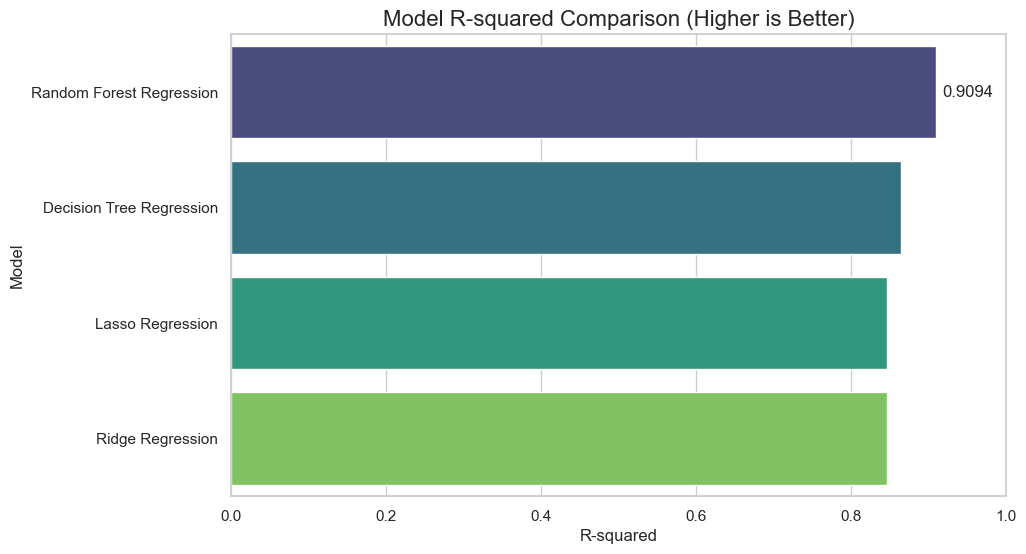

In [12]:
# ==================================
# 10. PLOT 1: R-SQUARED COMPARISON
# ==================================
try:
    # Sort models by R-squared, descending (best model at the top)
    df_r2 = performance_df.sort_values(by='R-squared', ascending=False)
    
    plt.figure(figsize=(10, 6))
    
    # Create the horizontal bar plot
    ax = sns.barplot(
        x=df_r2['R-squared'], 
        y=df_r2.index, 
        palette='viridis'
    )
    
    # Add labels and title
    plt.title('Model R-squared Comparison (Higher is Better)', fontsize=16)
    plt.xlabel('R-squared', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    
    # Add the R-squared value labels to the end of the bars
    ax.bar_label(ax.containers[0], fmt='%.4f', padding=5)
    
    # Set x-axis limit
    plt.xlim(0, 1.0)
    
    # Save the figure
    plt.savefig('r_squared_comparison.png')
    
    # Show the plot
    plt.show()
    
except NameError:
    print("Error: 'performance_df' not found. Please run Cell 9 first.")

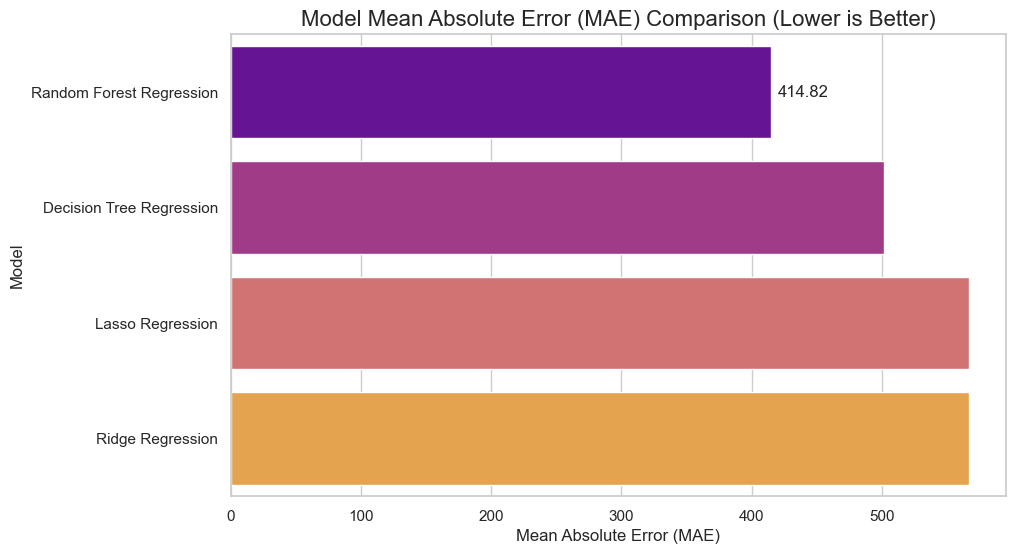

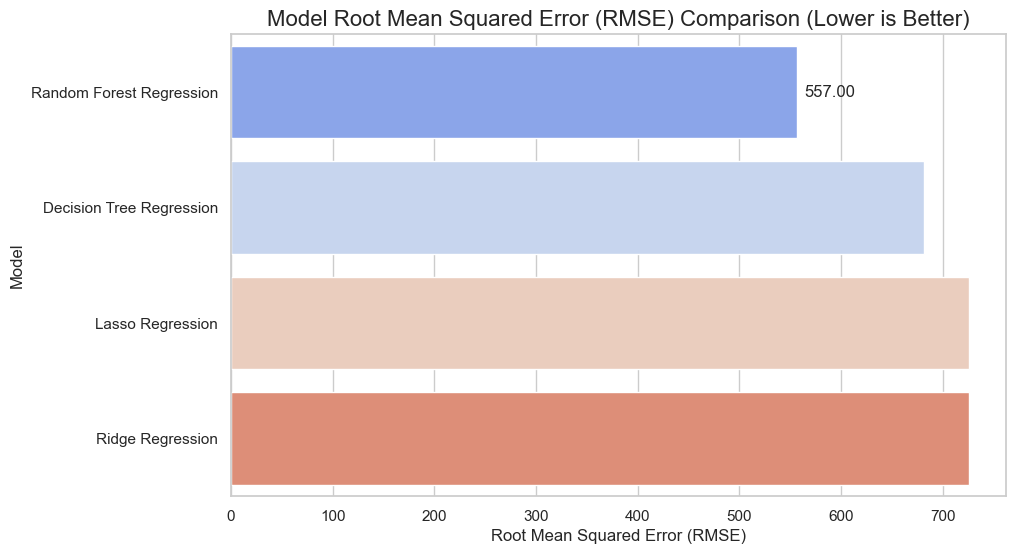

In [13]:
# ==================================
# 11. PLOTS 2 & 3: ERROR COMPARISON (MAE & RMSE)
# ==================================
try:
    # --- PLOT 2: MAE (Mean Absolute Error) ---
    
    # Sort models by MAE, ascending (best model at the top)
    df_mae = performance_df.sort_values(by='MAE', ascending=True)
    
    plt.figure(figsize=(10, 6))
    
    ax_mae = sns.barplot(
        x=df_mae['MAE'], 
        y=df_mae.index, 
        palette='plasma'
    )
    
    plt.title('Model Mean Absolute Error (MAE) Comparison (Lower is Better)', fontsize=16)
    plt.xlabel('Mean Absolute Error (MAE)', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    ax_mae.bar_label(ax_mae.containers[0], fmt='%.2f', padding=5)
    plt.savefig('mae_comparison.png')
    plt.show()

    
    # --- PLOT 3: RMSE (Root Mean Squared Error) ---
    
    # Sort models by RMSE, ascending (best model at the top)
    df_rmse = performance_df.sort_values(by='RMSE', ascending=True)
    
    plt.figure(figsize=(10, 6))
    
    ax_rmse = sns.barplot(
        x=df_rmse['RMSE'], 
        y=df_rmse.index, 
        palette='coolwarm'
    )
    
    plt.title('Model Root Mean Squared Error (RMSE) Comparison (Lower is Better)', fontsize=16)
    plt.xlabel('Root Mean Squared Error (RMSE)', fontsize=12)
    plt.ylabel('Model', fontsize=12)
    ax_rmse.bar_label(ax_rmse.containers[0], fmt='%.2f', padding=5)
    plt.savefig('rmse_comparison.png')
    plt.show()

except NameError:
    print("Error: 'performance_df' not found. Please run Cell 9 first.")

Loaded best model 'Random Forest Regression' from 'random_forest_regression_model.pkl'


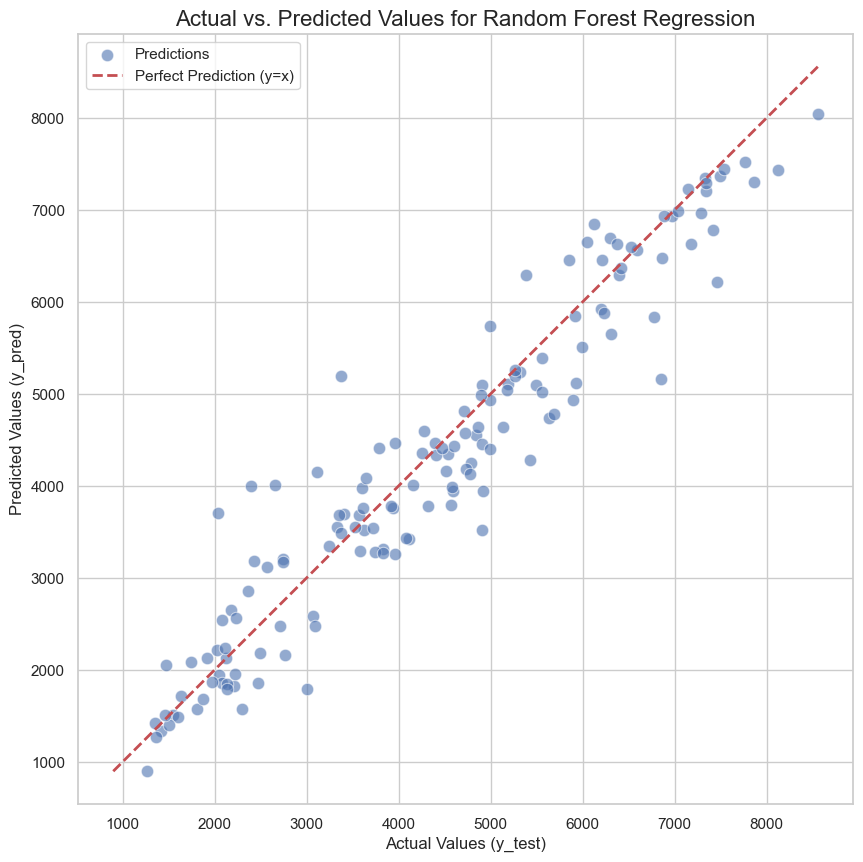

In [14]:
# ==================================
# 12. PLOT 4: ACTUAL VS. PREDICTED (FOR BEST MODEL)
# ==================================
try:
    # Get the name of the best model (top of the R-squared list)
    best_model_name = performance_df.sort_values(by='R-squared', ascending=False).index[0]
    
    # Create the filename for the best model
    model_filename = f"{best_model_name.lower().replace(' ', '_')}_model.pkl"

    # Load the best model from its .pkl file
    with open(model_filename, 'rb') as f:
        best_model = pickle.load(f)
        
    print(f"Loaded best model '{best_model_name}' from '{model_filename}'")

    # Use the 'X_test_scaled' and 'y_test' from Cell 5 to make predictions
    y_pred_best = best_model.predict(X_test_scaled)

    # Create the scatter plot
    plt.figure(figsize=(10, 10))
    
    # Plot predicted vs actual values
    sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, s=80, label="Predictions")
    
    # Plot the "perfect prediction" line (y=x)
    # Find the min and max values to set the line's range
    min_val = min(y_test.min(), y_pred_best.min())
    max_val = max(y_test.max(), y_pred_best.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Prediction (y=x)")
    
    plt.title(f'Actual vs. Predicted Values for {best_model_name}', fontsize=16)
    plt.xlabel('Actual Values (y_test)', fontsize=12)
    plt.ylabel('Predicted Values (y_pred)', fontsize=12)
    plt.legend(loc='upper left')
    plt.axis('equal') # Makes the x and y axes have the same scale
    plt.grid(True)
    
    plt.savefig('actual_vs_predicted_scatter.png')
    plt.show()

except NameError:
    print("Error: Could not find variables from previous cells (e.g., X_test_scaled, performance_df).")
    print("Please ensure you have run Cells 5, 8, and 9 first.")
except FileNotFoundError:
    print(f"Error: Could not find the model file '{model_filename}'.")
    print("Please run Cell 7 to save the models.")
except Exception as e:
    print(f"An error occurred: {e}")